# Purpose of this simulation


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tables
import aopy

import numpy as np
np.set_printoptions(precision=5, suppress=True)
sns.set_context('talk')

PermissionError: [Errno 13] Permission denied: 'convert'

# ideas

In [61]:
# this is for creating exp_conditions that scan the difference across the files
data_dump_folder = '/home/sijia66/data/part0_gap_std_difference_random/'

noise = 32 # Hz
random_seed = 0
n_neurons = 128
# 
mean_first_peak = 50
mean_second_peak = 50

# clda parameters
rho = 0.5
batchlen = 100
exp_conds = []

std_differences = [1, 3, 9, 27]

for std_val in std_differences:
    std_second_peak = std_val
    exp_conds_wo = [f'wo_FS_{1.0}_{random_seed}_noise_{noise}_{n_neurons}_{mean_second_peak}_{std_second_peak}_clda_rho_{rho}_batchlen_{batchlen}' ]
    exp_conds_add = [f'iter_{1.0}_{random_seed}_noise_{noise}_{n_neurons}_{mean_second_peak}_{std_second_peak}_clda_rho_{rho}_batchlen_{batchlen}' ]
    exp_conds_keep = [f'same_{1.0}_{random_seed}_noise_{noise}_{n_neurons}_{mean_second_peak}_{std_second_peak}_clda_rho_{rho}_batchlen_{batchlen}' ]

    # we add to the exp list
    exp_conds.extend(exp_conds_wo)
    exp_conds.extend(exp_conds_add)
    exp_conds.extend(exp_conds_keep)

feature_selection_schemes = ['w/o feature selection', 'iter', 'subset throughout']
N_conds = len(feature_selection_schemes)

for e in exp_conds:print(e)

num_std_differences = len(std_differences)

wo_FS_1.0_0_noise_32_128_50_1_clda_rho_0.5_batchlen_100
iter_1.0_0_noise_32_128_50_1_clda_rho_0.5_batchlen_100
same_1.0_0_noise_32_128_50_1_clda_rho_0.5_batchlen_100
wo_FS_1.0_0_noise_32_128_50_3_clda_rho_0.5_batchlen_100
iter_1.0_0_noise_32_128_50_3_clda_rho_0.5_batchlen_100
same_1.0_0_noise_32_128_50_3_clda_rho_0.5_batchlen_100
wo_FS_1.0_0_noise_32_128_50_9_clda_rho_0.5_batchlen_100
iter_1.0_0_noise_32_128_50_9_clda_rho_0.5_batchlen_100
same_1.0_0_noise_32_128_50_9_clda_rho_0.5_batchlen_100
wo_FS_1.0_0_noise_32_128_50_27_clda_rho_0.5_batchlen_100
iter_1.0_0_noise_32_128_50_27_clda_rho_0.5_batchlen_100
same_1.0_0_noise_32_128_50_27_clda_rho_0.5_batchlen_100


In [62]:
# build the file selector 
record_exp_conds = feature_selection_schemes * num_std_differences

record_stds = np.repeat(std_differences, N_conds)

print(record_stds)
print()

exp_meta_record = [(exp_i, cond, std) for exp_i, cond, std in zip(range(N_conds*num_std_differences), record_exp_conds, record_stds)]

for i in exp_meta_record: print(i)


[ 1  1  1  3  3  3  9  9  9 27 27 27]

(0, 'w/o feature selection', 1)
(1, 'iter', 1)
(2, 'subset throughout', 1)
(3, 'w/o feature selection', 3)
(4, 'iter', 3)
(5, 'subset throughout', 3)
(6, 'w/o feature selection', 9)
(7, 'iter', 9)
(8, 'subset throughout', 9)
(9, 'w/o feature selection', 27)
(10, 'iter', 27)
(11, 'subset throughout', 27)


# Preproc the feature files

In [63]:
from afs_files import load_feature_selection_files
(exp_data_all, exp_metadata_all) = load_feature_selection_files(data_dump_folder, exp_conds)
print(f'we collected {len(exp_data_all)} numbers of experiments')


we collected 12 numbers of experiments


# Check feature selection strategies

## check between conditions

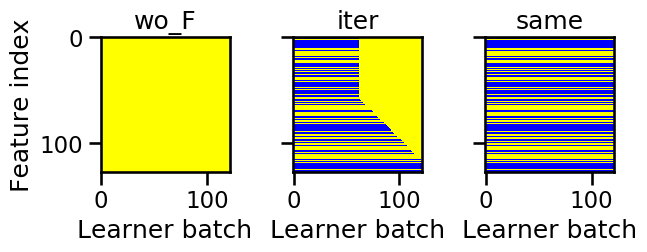

In [64]:
import importlib 
import afs_plotting
importlib.reload(afs_plotting)
from afs_plotting import plot_feature_selection


fig_feat_activity, ax_feat_activity = plt.subplots(1, 3, 
                                                   sharey = True)

fig_feat_activity.tight_layout()
for i, (e, a) in enumerate(zip(exp_data_all,  ax_feat_activity)):
    label_y = False
    if i == 0: label_y = True
    plot_feature_selection(e['feature_selection']['feat_set'], ax = a, label_y=label_y)

    a.set_title(exp_conds[i][:4])
    


# Behaviour comparision

## Calculate how many rewards for each condition

Text(0, 0.5, 'Number of rewards')

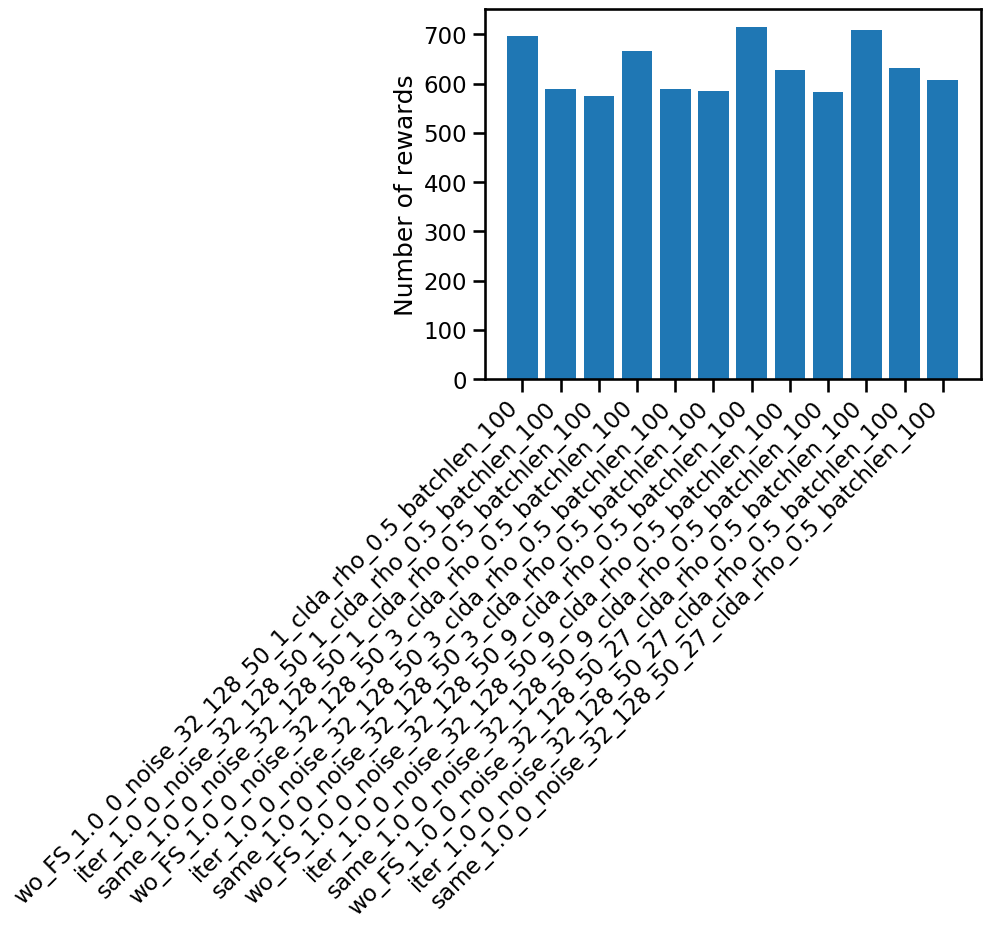

In [65]:
# for each events log, let's count how many REWARD
# this will be a rough proxy for user's performance.
# we use this to compare user's performance across the condition
rewards_all =  []

NUM_EXP = len(exp_data_all)

for i in range(NUM_EXP):
    events = exp_data_all[i]['events']['event']
    num_rewards = len(list(filter(lambda x: x == b'REWARD', events)))

    rewards_all.append(num_rewards)

rewards_all = np.array(rewards_all)

# this is for doing a bar diagram across the exp conds.
fig_rewards, ax_rewards = plt.subplots()
ax_rewards.bar(exp_conds, rewards_all)
ax_rewards.set_xticklabels(exp_conds, rotation=45, ha="right")
ax_rewards.set_ylabel("Number of rewards")

Text(0.5, 0, 'difference in modulation depth (Hz)')

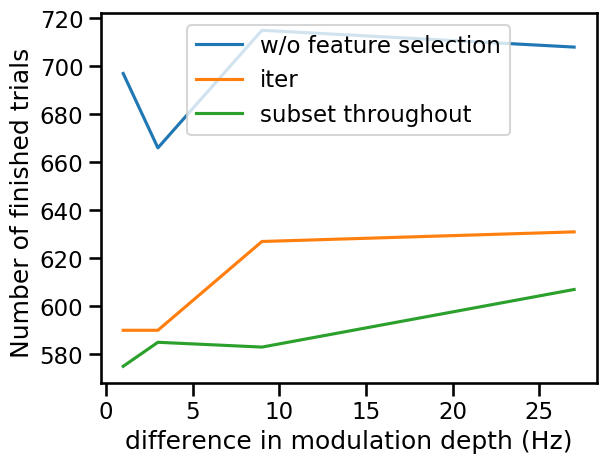

In [66]:

for cond in feature_selection_schemes:
    # select the files
    exp_conds_temp = list(filter(lambda x: x[1] == cond, exp_meta_record))
    iter_conds_temp = [e[0] for e in exp_conds_temp]

    rewards_all = []
    for i in iter_conds_temp:
        events = exp_data_all[i]['events']['event']
        num_rewards = len(list(filter(lambda x: x == b'REWARD', events)))
        rewards_all.append(num_rewards)

    rewards_all = np.array(rewards_all)

    plt.plot(std_differences, rewards_all)


plt.legend(feature_selection_schemes)
plt.ylabel('Number of finished trials ')

plt.xlabel('difference in modulation depth (Hz)')

## calculate reward rate

In [67]:
# let's calcualte the iter situation, right. 

exp_same_list = list(filter(lambda x: x[1] == "subset throughout", exp_meta_record ))
ind_same_list = [e[0] for e in exp_same_list]

print(ind_same_list)

fps = 60

reward_rate_all = list()
window_time_stamps_all = list()
NUM_EXP = len(exp_data_all)


for i in ind_same_list:

    time_stamps = exp_data_all[i]['events']['time'] / fps
    events = exp_data_all[i]['events']['event']

    (reward_rate, window_time_stamps) = aopy.analysis.calc_running_event_rate(b'REWARD', events, time_stamps, 
                                                                window_size= 120,
                                                                 window_step= 30)
    reward_rate_all.append(reward_rate)
    window_time_stamps_all.append(window_time_stamps)


window_stamps_all = np.array(window_time_stamps_all)
reward_rate_all = np.array(reward_rate_all) 

print(window_time_stamps.shape)
reward_rate_all.shape

[2, 5, 8, 11]
(36,)


(4, 36)

Index(['window stamp', 'Standard Deviation', 'Reward Rate'], dtype='object')


/home/sijia66/miniconda3/envs/afs/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/sijia66/miniconda3/envs/afs/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/sijia66/miniconda3/envs/afs/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/home/sijia66/miniconda3/envs/afs/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: Futur

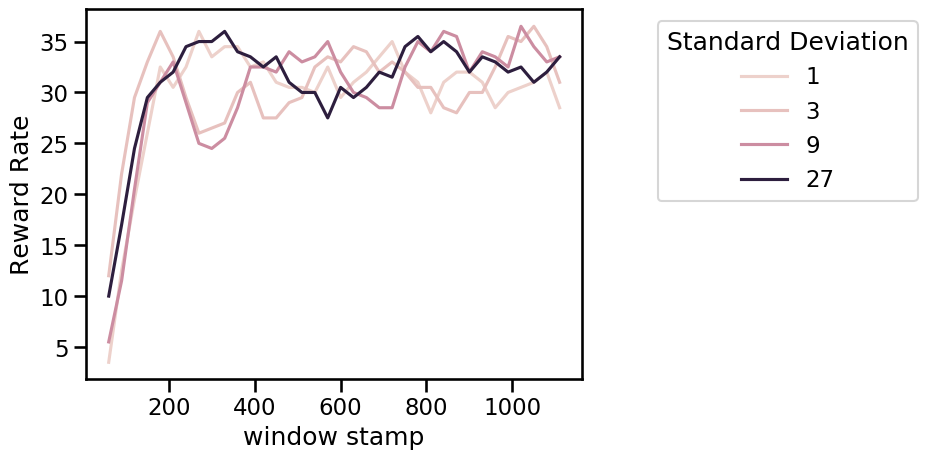

In [68]:
fig_iter, ax_iter = plt.subplots(1,1)

import pandas as pd



df = pd.DataFrame(reward_rate_all.T)
df.columns = std_differences
df["window_stamp"] = window_time_stamps


df_melt =  pd.melt(df, id_vars="window_stamp", value_vars=std_differences)
df_melt.rename(columns = {"window_stamp": "window stamp",
                         "variable": "Standard Deviation",
                         "value": "Reward Rate"} ,inplace = True)

print(df_melt.columns)

palette = sns.color_palette('flare', n_colors =  7)
l = sns.lineplot(x = "window stamp", y = "Reward Rate", hue = "Standard Deviation",
                 data = df_melt, 
                 ax=ax_iter, 
                 linestyle = "solid")
# ax_iter.axvline(600)
sns.move_legend(ax_iter, "upper right", bbox_to_anchor=(1.7, 1))

# Feature analysis

# R2 analysis

In [69]:
# load the requied libraries
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


In [70]:
# get the data batches
exp_index = 0


print("exp_index:", exp_index)
print(exp_data_all[exp_index].keys())
print(exp_data_all[exp_index]['bmi3d_clda'].dtype)

print('load the intended kin')

intended_kin = exp_data_all[exp_index]['bmi3d_clda']['intended_kin']
spike_counts_batch = exp_data_all[exp_index]['bmi3d_clda']['spike_counts_batch']

print('shapes of the data:')
print('intended kin:', intended_kin.shape)
print('spike_counts_batch:', spike_counts_batch.shape)

# only fitting to the velocities, right.
X_VEL_STATE = 3
Y_VEL_STATE = 5
CONST_STATE = 6
intended_velocities = intended_kin[:,(X_VEL_STATE, Y_VEL_STATE, CONST_STATE), :]
print('intended vel:', intended_velocities.shape)

exp_index: 0
dict_keys(['bmi3d_clda', 'bmi3d_task', 'bmi3d_state', 'bmi3d_clock', 'bmi3d_events', 'bmi3d_trials', 'task', 'state', 'clock', 'events', 'trials', 'feature_selection'])
[('kf_C', '<f8', (128, 7)), ('kf_Q', '<f8', (128, 128)), ('kf_C_xpose_Q_inv_C', '<f8', (7, 7)), ('kf_C_xpose_Q_inv', '<f8', (7, 128)), ('mFR', '<f8', (128,)), ('sdFR', '<f8', (128,)), ('rho', '<f8', (1,)), ('intended_kin', '<f8', (7, 100)), ('spike_counts_batch', '<f8', (128, 100))]
load the intended kin
shapes of the data:
intended kin: (120, 7, 100)
spike_counts_batch: (120, 128, 100)
intended vel: (120, 3, 100)


In [71]:
# let's take one batch example and think through it. 
# and compare it to the whole set vs. the subset. 

spike_counts_one_batch  = spike_counts_batch[0, :,:]
intended_velocities_one_batch = intended_velocities[0,:,:]


print("dims of spike counts one batch", spike_counts_one_batch.shape)
print("intended vel one batch", intended_velocities_one_batch.shape)

linear_reg_model = LinearRegression()
linear_reg_model.fit(spike_counts_one_batch.T, intended_velocities_one_batch.T)


linear_reg_model.coef_.shape

dims of spike counts one batch (128, 100)
intended vel one batch (3, 100)


(3, 128)

In [72]:
## then we can calculate the R^2 value
# predict
predicted_velocities = linear_reg_model.predict(spike_counts_one_batch.T)
score=r2_score(intended_velocities_one_batch.T, predicted_velocities)

print(score)

1.0


In [73]:
# do this across the batch
num_batches = len(spike_counts_batch)


r_values = [None] * num_batches

linear_reg_model = LinearRegression()

for i in range(num_batches):

    spike_counts_one_batch  = spike_counts_batch[i, :,:]
    intended_velocities_one_batch = intended_velocities[i,:,:]

    linear_reg_model.fit(spike_counts_one_batch.T, intended_velocities_one_batch.T)

    predicted_velocities = linear_reg_model.predict(spike_counts_one_batch.T)
    score=r2_score(intended_velocities_one_batch.T, predicted_velocities)

    r_values[i] = score

print("Finished ")

Finished 


In [74]:
# do this across the batch
num_batches = len(spike_counts_batch)


r_values_vel_to_fire = [None] * num_batches

linear_reg_model = LinearRegression()

for i in range(num_batches):

    spike_counts_one_batch  = spike_counts_batch[i, :,:]
    intended_velocities_one_batch = intended_velocities[i,:,:]

    linear_reg_model.fit( intended_velocities_one_batch.T,spike_counts_one_batch.T,)

    predicted_firing_rates = linear_reg_model.predict(intended_velocities_one_batch.T)
    score=r2_score(spike_counts_one_batch.T, predicted_firing_rates)

    r_values_vel_to_fire[i] = score

Text(0.5, 1.0, 'R2 by fitting intended vel to firing rates')

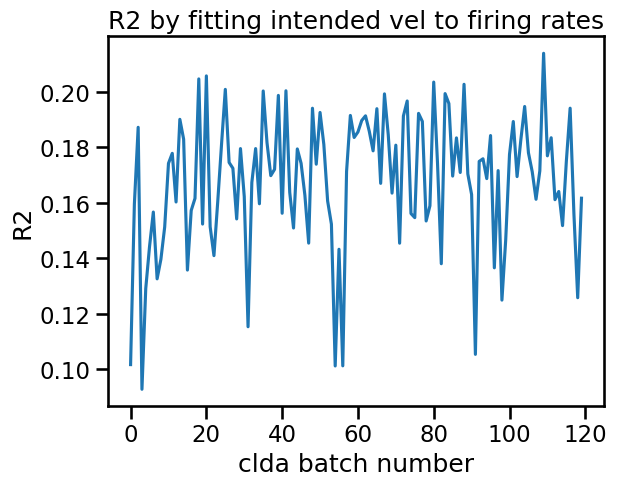

In [75]:
plt.plot(r_values_vel_to_fire)
plt.xlabel('clda batch number')
plt.ylabel('R2')
plt.title('R2 by fitting intended vel to firing rates')

In [76]:
feature_selection_data = exp_data_all[-1]['feature_selection']
print('feature_selection_data.keys')
print(feature_selection_data.keys())

feat_set =  feature_selection_data["feat_set"]
sim_C = feature_selection_data['sim_C']
C_mat = feature_selection_data["C_mat"]
C_mat.shape

feature_selection_data.keys
dict_keys(['C_mat', 'K_mat', 'Q_diag', 'assist_level', 'batch_size', 'batch_time', 'feat_set', 'feature_weights', 'fixed_noise_level', 'half_life', 'init_feat_set', 'n_starting_feats', 'n_states', 'no_noise_neuron_ind', 'noise_mode', 'noise_neuron_ind', 'percent_noise', 'sim_C', 'total_exp_time', 'train_high_SNR_time', 'transform_x_flag', 'transform_y_flag'])


(121, 128, 7)

In [77]:
feature_selection_data['n_starting_feats']

128

In [78]:
# calculate 
no_noise_neuron_ind = np.squeeze(feature_selection_data["no_noise_neuron_ind"])
noise_neuron_ind = np.squeeze(feature_selection_data["noise_neuron_ind"])

print(no_noise_neuron_ind.shape)
print(noise_neuron_ind)
spike_counts_one_batch  = spike_counts_batch[0, :,:]
spike_counts_high_SNR_one_batch = spike_counts_batch[0, no_noise_neuron_ind,:]
intended_velocities_one_batch = intended_velocities[0,:,:]


print("dims of spike counts one batch", spike_counts_one_batch.shape)
print("dims of spike counts for the subset", spike_counts_high_SNR_one_batch.shape)
print("intended vel one batch", intended_velocities_one_batch.shape)

fullset_reg_model = LinearRegression()
fullset_reg_model.fit(spike_counts_one_batch.T, intended_velocities_one_batch.T)
print("shape of the full set", fullset_reg_model.coef_.shape)


subset_reg_model = LinearRegression()
subset_reg_model.fit(spike_counts_high_SNR_one_batch.T, intended_velocities_one_batch.T)
print("shape of the subset", subset_reg_model.coef_.shape)


(63,)
[ 63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127]
dims of spike counts one batch (128, 100)
dims of spike counts for the subset (63, 100)
intended vel one batch (3, 100)
shape of the full set (3, 128)
shape of the subset (3, 63)


In [79]:
fullset_pred_velocities = fullset_reg_model.predict(spike_counts_one_batch.T)
subset_pred_velocities = subset_reg_model.predict(spike_counts_high_SNR_one_batch.T)

full_set_score=r2_score(intended_velocities_one_batch.T, fullset_pred_velocities)
subset_score = r2_score(intended_velocities_one_batch.T, subset_pred_velocities)

print("full_set_score", full_set_score)
print("subset score", subset_score)

full_set_score 1.0
subset score 0.9263893594415674


In [80]:
from sklearn.metrics import r2_score

def calc_R2(spike_counts_batch, intended_velocities, debug = True):
    """
    calculates R2 by fitting spike_counts to intende_velocities.
    it also does type checking that allows handling of input types of either list or np.ndarray
    params:
        spike_counts_batch (num of batch by num units by num of data points per batch)
        intended_velocities (num of batch by num states by intended velocities)
    returns:
        r_values (num_batches)
        coefs: the fitted coefs. 
    """

    if isinstance(spike_counts_batch, list) and isinstance(intended_velocities, list):
        num_batches = len(spike_counts_batch)
    elif isinstance(spike_counts_batch, np.ndarray) and isinstance(intended_velocities, np.ndarray):
        num_batches = spike_counts_batch.shape[0]
    else:
        raise Exception(f"mixed input types of {type(spike_counts_batch)} and {type(intended_velocities)}")
    

    print(num_batches)

    coefs =  list()
    r_values = [None] * num_batches

    linear_reg_model = LinearRegression()

    for i in range(num_batches):

        if isinstance(spike_counts_batch, np.ndarray): 
            spike_counts_one_batch  = spike_counts_batch[i, :,:]
            intended_velocities_one_batch = intended_velocities[i,:,:]
        elif isinstance(spike_counts_batch, list):
            spike_counts_one_batch = spike_counts_batch[i]
            intended_velocities_one_batch = intended_velocities[i]


        linear_reg_model.fit(spike_counts_one_batch.T, intended_velocities_one_batch.T)

        #save the fitted coefs.
        coefs.append(linear_reg_model.coef_.copy())
        #print(linear_reg_model.coef_.shape)

        # calculate R2 values
        predicted_velocities = linear_reg_model.predict(spike_counts_one_batch.T)
        score=r2_score(intended_velocities_one_batch.T, predicted_velocities)

        r_values[i] = score

    return np.array(r_values), coefs


def calc_R2_with_sim_C( spike_counts_batch,intended_velocities, C_mat, active_set, 
                       remove_first_and_last_Batch = True, 
                       c_mat_remove_first_batch = True, 
                       select_only_vel_states = True,
                       select_features_with_active_set = False,
                       debug = True):
    
    
    if debug:
        print("intended_velocities", intended_velocities.shape)
        print("spike_counts_batch", spike_counts_batch.shape)
        print("C_mat", C_mat.shape)
        print("active_set", active_set.shape)
    
    if remove_first_and_last_Batch:
        active_set = active_set[1:-1, :]
    if c_mat_remove_first_batch:
        C_mat = C_mat[1:, :, : ]
        
    if select_only_vel_states:
        C_mat = C_mat[:,:,(X_VEL_STATE, Y_VEL_STATE,CONST_STATE)]
        
    
    if debug:
        print("intended_velocities", intended_velocities.shape)
        print("spike_counts_batch", spike_counts_batch.shape)
        print("C_mat", C_mat.shape)
        print("active_set", active_set.shape)
        
    # then we iterate through the batch sort of thing.
    NUM_LEARNER_BATCHES = intended_velocities.shape[0]
    
    R_2_over_batch = []
    
    for i in range(NUM_LEARNER_BATCHES):
        
        batch_vel =  intended_velocities[i,:,:]
        
        #  we can only compare to what's being used in the calculation
        if select_features_with_active_set:
            batch_spike_counts = spike_counts_batch[i,active_set[i,:],:].T
        else:
            batch_spike_counts = spike_counts_batch[i,: ,:].T
        
        batch_c_mat = C_mat[i,:,:]
        
        selected_c_mat = batch_c_mat[active_set[i,:],:]

        estimated_spike_counts = selected_c_mat @ batch_vel
        
        score = r2_score(batch_spike_counts, estimated_spike_counts.T)
        
        R_2_over_batch.append(score)
        
    return R_2_over_batch
        
    
    

In [81]:
R_2_over_batches = calc_R2_with_sim_C(spike_counts_batch, intended_velocities, C_mat, feat_set,
                                      select_features_with_active_set = True)

intended_velocities (120, 3, 100)
spike_counts_batch (120, 128, 100)
C_mat (121, 128, 7)
active_set (122, 128)
intended_velocities (120, 3, 100)
spike_counts_batch (120, 128, 100)
C_mat (120, 128, 3)
active_set (120, 128)


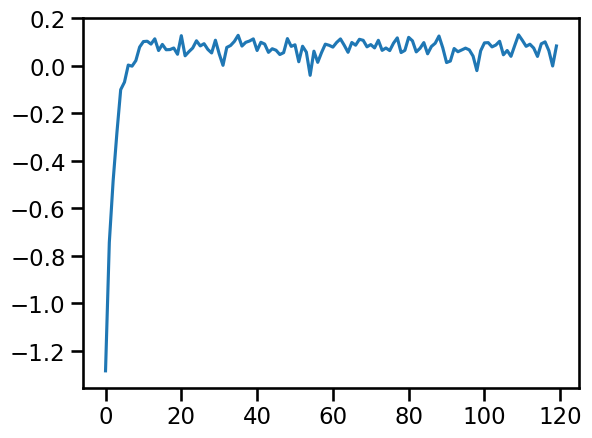

In [82]:
plt.plot(R_2_over_batches)

## Feature batch discussion

In [83]:
feature_selection_data = exp_data_all[-3]["feature_selection"]
feature_selection_same_active_feature = exp_data_all[-1]["feature_selection"]["feat_set"]

same_feature_set = feature_selection_same_active_feature[-1,:]

In [84]:
sum(same_feature_set)

58

In [85]:
# we want to see if the different 

r_values_same_list, coefs_same_list = [], []

for exp_index in ind_same_list:
    intended_kin = exp_data_all[exp_index]['bmi3d_clda']['intended_kin']
    spike_counts_batch = exp_data_all[exp_index]['bmi3d_clda']['spike_counts_batch']
    print(spike_counts_batch.shape)
#     spike_counts_batch_selected = spike_counts_batch[]
    
    r_values, coefs = calc_R2(  spike_counts_batch, intended_velocities)
    
    r_values_same_list.append(r_values)
    coefs_same_list.append(coefs)

r_values_same_list = np.array(r_values_same_list)
coefs_same_list = np.array(coefs_same_list)

(120, 58, 100)
120
(120, 58, 100)
120
(120, 58, 100)
120
(120, 58, 100)
120


In [86]:
color_pallete = sns.color_palette("mako")


num_of_terms = 60
filt = np.ones(num_of_terms)
r_values_same_list_filtered = \
np.apply_along_axis(lambda m: np.convolve(m, filt, mode='valid') /num_of_terms , axis=1,
                    arr=r_values_same_list)


/tmp/ipykernel_28433/2432950874.py:1: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.lineplot((r_values_same_list_filtered[:,:].T),palette = color_pallete)
/home/sijia66/miniconda3/envs/afs/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/sijia66/miniconda3/envs/afs/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/sijia66/miniconda3/envs/afs/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will

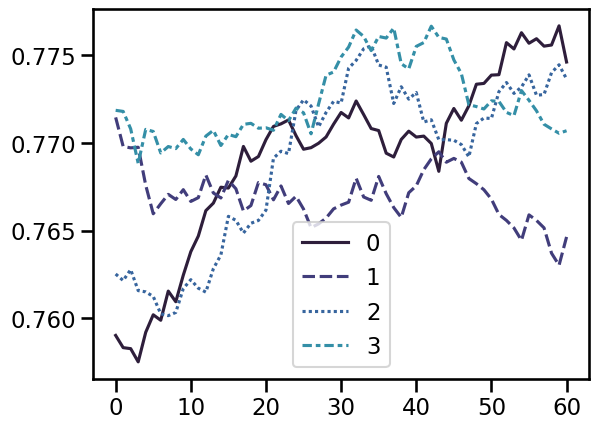

In [87]:
sns.lineplot((r_values_same_list_filtered[:,:].T),palette = color_pallete)

##  we calculate R2 with C_mat to measure the relevance of the signal


In [88]:
R_2_over_batches_all_exp = []

for exp_index in ind_same_list:
    intended_kin = exp_data_all[exp_index]['bmi3d_clda']['intended_kin']
    spike_counts_batch = exp_data_all[exp_index]['bmi3d_clda']['spike_counts_batch']
    
    intended_velocities = intended_kin[:,(X_VEL_STATE, Y_VEL_STATE, CONST_STATE), :]
    
    # get C_mat
    feature_selection_data = exp_data_all[exp_index]['feature_selection']
    C_mat = feature_selection_data["C_mat"]
    feat_set = feature_selection_data["feat_set"]
    
    # calculate R_2 over batches
    R_2_over_batches = calc_R2_with_sim_C(spike_counts_batch, intended_velocities, C_mat, feat_set, debug = False)
    
    #save  the results
    R_2_over_batches_all_exp.append(R_2_over_batches)
    
    print(exp_index)
    
R_2_over_batches_all_exp = np.array(R_2_over_batches_all_exp)

2
5
8
11


/tmp/ipykernel_28433/1028660672.py:1: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.lineplot(R_2_over_batches_all_exp.T,
/home/sijia66/miniconda3/envs/afs/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/sijia66/miniconda3/envs/afs/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/sijia66/miniconda3/envs/afs/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  

Text(0, 0.5, 'R^2')

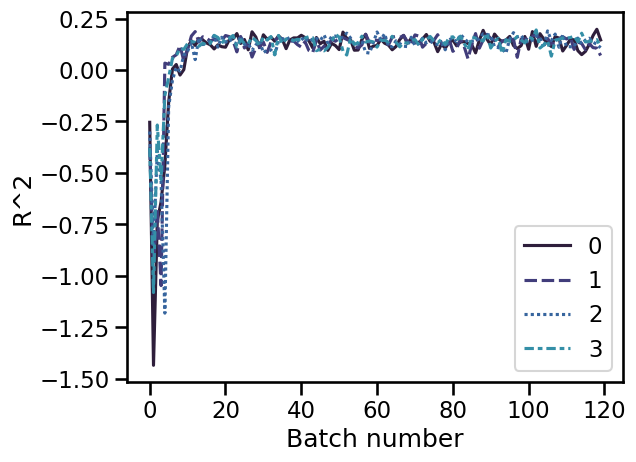

In [89]:
sns.lineplot(R_2_over_batches_all_exp.T,
             palette = color_pallete)
plt.xlabel("Batch number")
plt.ylabel("R^2")


/tmp/ipykernel_28433/4093510984.py:1: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.lineplot(R_2_over_batches_all_exp.T,palette = color_pallete)
/home/sijia66/miniconda3/envs/afs/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/sijia66/miniconda3/envs/afs/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/sijia66/miniconda3/envs/afs/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be remove

Text(0, 0.5, 'R^2')

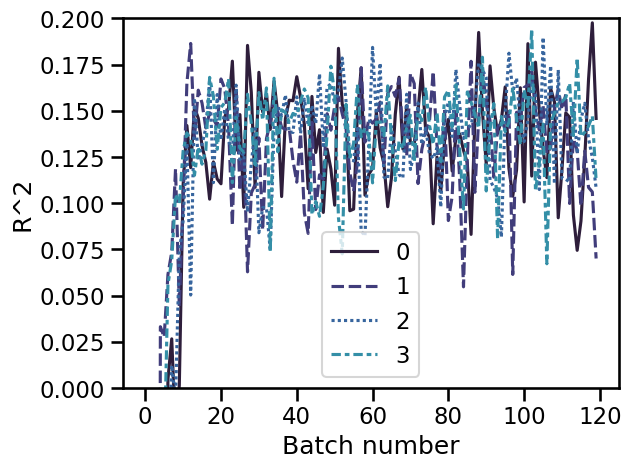

In [91]:
sns.lineplot(R_2_over_batches_all_exp.T,palette = color_pallete)
plt.ylim([0, 0.2])
plt.xlabel("Batch number")
plt.ylabel("R^2")


In [146]:
# get the data batches
exp_index = -1


print("exp_index:", exp_index)
print(exp_data_all[exp_index].keys())
print(exp_data_all[exp_index]['bmi3d_clda'].dtype)

print('load the intended kin')

intended_kin = exp_data_all[exp_index]['bmi3d_clda']['intended_kin']
spike_counts_batch = exp_data_all[exp_index]['bmi3d_clda']['spike_counts_batch']

print('shapes of the data:')
print('intended kin:', intended_kin.shape)
print('spike_counts_batch:', spike_counts_batch.shape)

# only fitting to the velocities, right.
X_VEL_STATE = 3
Y_VEL_STATE = 5
intended_velocities = intended_kin[:,(X_VEL_STATE, Y_VEL_STATE), :]
print('intended vel:', intended_velocities.shape)


r_values_full_set = calc_R2( intended_velocities, spike_counts_batch)
r_values_high_snr_subset = calc_R2( intended_velocities, spike_counts_batch[:, no_noise_neuron_ind,:])
r_values_low_snr_subset = calc_R2( intended_velocities, spike_counts_batch[:, noise_neuron_ind,:])


exp_index: -1
dict_keys(['bmi3d_clda', 'bmi3d_task', 'bmi3d_state', 'bmi3d_clock', 'bmi3d_events', 'bmi3d_trials', 'task', 'state', 'clock', 'events', 'trials', 'feature_selection'])
[('kf_C', '<f8', (58, 7)), ('kf_Q', '<f8', (58, 58)), ('kf_C_xpose_Q_inv_C', '<f8', (7, 7)), ('kf_C_xpose_Q_inv', '<f8', (7, 58)), ('mFR', '<f8', (58,)), ('sdFR', '<f8', (58,)), ('rho', '<f8', (1,)), ('intended_kin', '<f8', (7, 100)), ('spike_counts_batch', '<f8', (58, 100))]
load the intended kin
shapes of the data:
intended kin: (120, 7, 100)
spike_counts_batch: (120, 58, 100)
intended vel: (120, 2, 100)
120


IndexError: index 58 is out of bounds for axis 1 with size 58

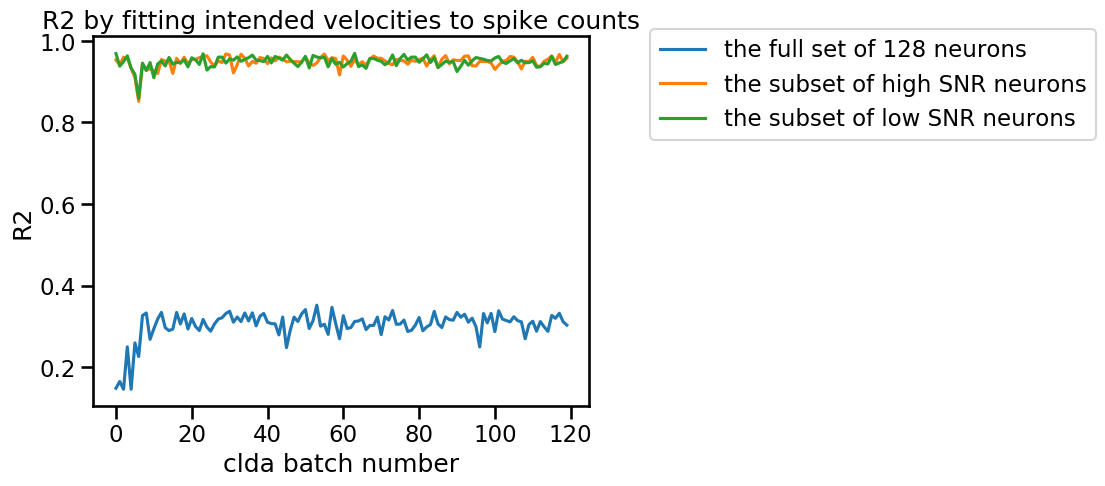

In [48]:
plt.plot(r_values_full_set[0])
plt.plot(r_values_high_snr_subset[0])
plt.plot(r_values_low_snr_subset[0])
plt.xlabel('clda batch number')
plt.ylabel('R2')
plt.title('R2 by fitting intended velocities to spike counts')
plt.legend(['the full set of 128 neurons',
            'the subset of high SNR neurons', 
            'the subset of low SNR neurons'],bbox_to_anchor=(1.1, 1.05)
            )
#plt.ylim([])

In [49]:
n = 100
p = 128
adj_r2_fullset = 1-(1-r_values_full_set)*(n-1)/(n-p-1)


p =  63
adj_r2_high_snr_subset = 1-(1-r_values_high_snr_subset)*(n-1)/(n-p-1)
adj_r2_low_snr_subset = 1-(1-r_values_low_snr_subset)*(n-1)/(n-p-1)


TypeError: unsupported operand type(s) for -: 'int' and 'tuple'

(-1.9738871303691246, 4.579793191573823)

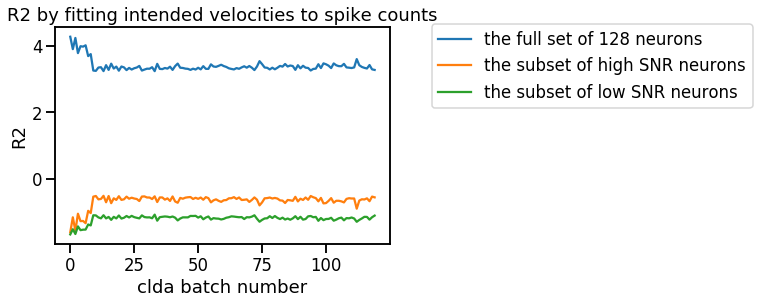

In [118]:
plt.plot(adj_r2_fullset)
plt.plot(adj_r2_high_snr_subset)
plt.plot(adj_r2_low_snr_subset)
plt.xlabel('clda batch number')
plt.ylabel('R2')
plt.title('R2 by fitting intended velocities to spike counts')
plt.legend(['the full set of 128 neurons',
            'the subset of high SNR neurons', 
            'the subset of low SNR neurons'],bbox_to_anchor=(1.1, 1.05)
            )
plt.ylim()

## apply the analysis to iterative feature selection

In [58]:
exp_meta_record[:3]

[(0, 'w/o feature selection', 0), (1, 'iter', 0), (2, 'subset throughout', 0)]

In [59]:
# select the index
exp_conds_iter_50 = list(filter(lambda x: x[1] == "iter" and x[2] == 50, exp_meta_record))
exp_conds_iter_50_ind = exp_conds_iter_50[0][0]

exp_conds_iter_50_ind

16

In [60]:
# get the data batches
exp_index = exp_conds_iter_50_ind


print("exp_index:", exp_index)
print(exp_data_all[exp_index].keys())
print(exp_data_all[exp_index]['bmi3d_clda'].dtype)

print('load the intended kin')

intended_kin = exp_data_all[exp_index]['bmi3d_clda']['intended_kin']
spike_counts_batch = exp_data_all[exp_index]['bmi3d_clda']['spike_counts_batch']

print('shapes of the data:')
print('intended kin:', intended_kin.shape)
print('spike_counts_batch:', spike_counts_batch.shape)

# only fitting to the velocities, right.
X_VEL_STATE = 3
Y_VEL_STATE = 5
CONST_STATE = 6
intended_velocities = intended_kin[:,(X_VEL_STATE, Y_VEL_STATE), :]
print('intended vel:', intended_velocities.shape)

exp_index: 16
dict_keys(['bmi3d_clda', 'bmi3d_task', 'bmi3d_state', 'bmi3d_clock', 'bmi3d_events', 'bmi3d_trials', 'task', 'state', 'clock', 'events', 'trials', 'feature_selection'])
[('kf_C', '<f8', (58, 7)), ('kf_Q', '<f8', (58, 58)), ('kf_C_xpose_Q_inv_C', '<f8', (7, 7)), ('kf_C_xpose_Q_inv', '<f8', (7, 58)), ('mFR', '<f8', (58,)), ('sdFR', '<f8', (58,)), ('rho', '<f8', (1,)), ('intended_kin', '<f8', (7, 100)), ('spike_counts_batch', '<f8', (58, 100))]
load the intended kin
shapes of the data:
intended kin: (61, 7, 100)
spike_counts_batch: (61, 58, 100)
intended vel: (61, 2, 100)


In [61]:
r_values_iter_start, coefs = calc_R2( intended_velocities, spike_counts_batch)
print(r_values_iter_start)


61
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


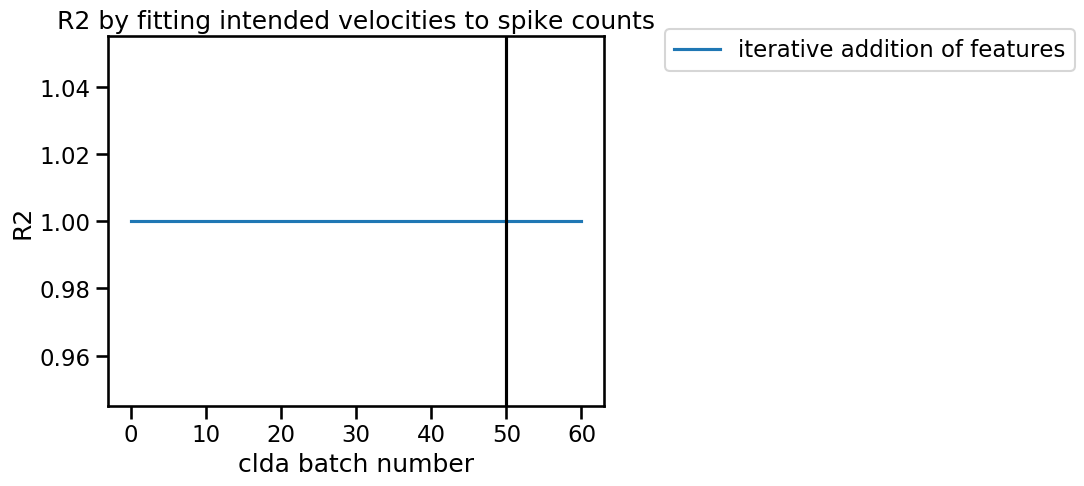

In [62]:
plt.plot(r_values_iter_start)
plt.xlabel('clda batch number')
plt.ylabel('R2')
plt.title('R2 by fitting intended velocities to spike counts')
plt.legend(['iterative addition of features'],bbox_to_anchor=(1.1, 1.05)
            )
plt.ylim()
plt.axvline(50, color = 'k')

120


/home/sijia66/miniconda3/envs/afs/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: setting an array element with a sequence.

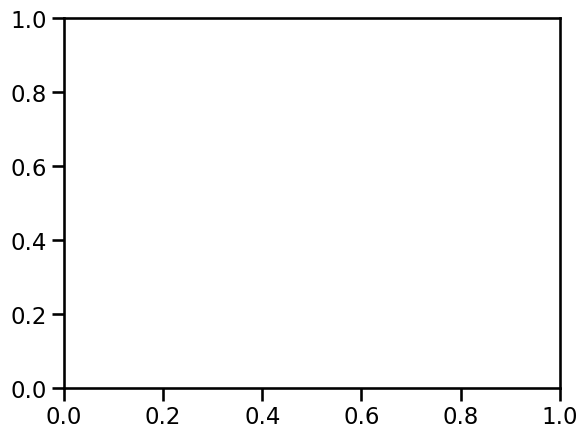

In [40]:
r_values_iter_start_spike_to_int = calc_R2( spike_counts_batch, intended_velocities)

plt.plot(r_values_iter_start_spike_to_int)
plt.xlabel('clda batch number')
plt.ylabel('R2')
plt.title('R2 by fitting intended velocities to spike counts')
plt.legend(['iterative addition of features'],bbox_to_anchor=(1.1, 1.05)
            )
plt.ylim()

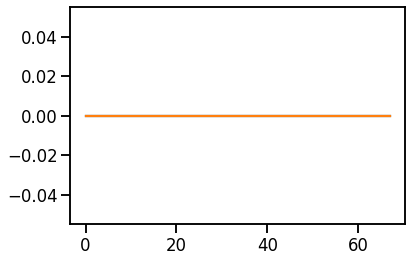

In [100]:
plt.plot(coefs[48] - coefs[50])

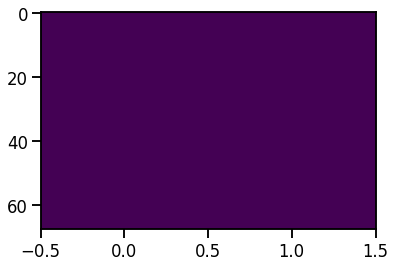

In [102]:
plt.imshow(coefs[48], aspect = "auto" )

In [103]:
coefs[48]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [106]:
coefs[48]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [107]:
spike_counts_batch[48,:,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [108]:
intended_kin[48,:,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

In [36]:
# this is for creating exp_conditions that scan the difference across the files
data_dump_folder = \
'/home/sijia-aw/BMi3D_my/operation_funny_chicken/sim_data/gaussian_peaks/2022_02_17_gaussian_peaks/'

noise = 32 # Hz
random_seed = 0
n_neurons = 128
# 
mean_first_peak = 50
mean_differences = np.arange(50, 60,  step = 10 )
num_mean_differences = len(mean_differences)
std = 10

# clda parameters
rho = 0.5
batchlen = 100


exp_conds = []

for mean_diff in mean_differences:
    mean_second_peak = mean_first_peak + mean_diff
    exp_conds_wo = [f'wo_FS_{1.0}_{random_seed}_noise_{noise}_{n_neurons}_{mean_second_peak}_{std}_clda_rho_{rho}_batchlen_{batchlen}' ]
    exp_conds_add = [f'iter_{1.0}_{random_seed}_noise_{noise}_{n_neurons}_{mean_second_peak}_{std}_clda_rho_{rho}_batchlen_{batchlen}' ]
    exp_conds_keep = [f'same_{1.0}_{random_seed}_noise_{noise}_{n_neurons}_{mean_second_peak}_{std}_clda_rho_{rho}_batchlen_{batchlen}' ]

    # we add to the exp list
    exp_conds.extend(exp_conds_wo)
    exp_conds.extend(exp_conds_add)
    exp_conds.extend(exp_conds_keep)

feature_selection_schemes = ['w/o feature selection', 'iter', 'subset throughout']
N_conds = len(feature_selection_schemes)

print(exp_conds)

['wo_FS_1.0_0_noise_32_128_100_10_clda_rho_0.5_batchlen_100', 'iter_1.0_0_noise_32_128_100_10_clda_rho_0.5_batchlen_100', 'same_1.0_0_noise_32_128_100_10_clda_rho_0.5_batchlen_100']


In [66]:
# load the pickled file for some quick analysis

exp_ind = 1






In [65]:
clda_data_full = load_clda_pickle_file(data_dump_folder, exp_conds)
len(clda_data_full)

3

In [67]:
clda_data_full[0][0].keys()
len(clda_data)

120

In [69]:
# 
clda_dict_full = load_and_convert_clda_pickle_files(data_dump_folder, exp_conds)

len(clda_data_full)

3

In [48]:
clda_dict = convert_to_list(clda_data)
clda_dict.keys()

dict_keys(['kf.C', 'kf.Q', 'kf.C_xpose_Q_inv_C', 'kf.C_xpose_Q_inv', 'mFR', 'sdFR', 'rho', 'intended_kin', 'spike_counts_batch'])

In [50]:


print('load the intended kin')

intended_kin_list = clda_dict['intended_kin']
spike_counts_batch_list = clda_dict['spike_counts_batch']

print('shapes of the data:')
print('intended kin:', len(intended_kin_list), intended_kin_list[0].shape)
print('spike_counts_batch:', len(spike_counts_batch_list), spike_counts_batch_list[0].shape)

# only fitting to the velocities, right.
X_VEL_STATE = 3
Y_VEL_STATE = 5
CONST_STATE = 6
intended_velocities_list = [d[(X_VEL_STATE, Y_VEL_STATE),:] for d in intended_kin_list]
print('intended vel:', intended_velocities_list[0].shape)

load the intended kin
shapes of the data:
intended kin: 120 (7, 100)
spike_counts_batch: 120 (68, 100)
intended vel: (2, 100)


120


(0.9251659109624865, 1.0035635280494053)

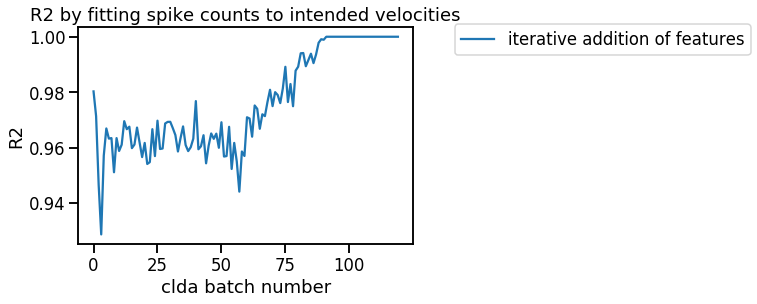

In [57]:
r_values_iter_start_spike_to_int, coefs = calc_R2( spike_counts_batch_list, intended_velocities_list)


plt.plot(r_values_iter_start_spike_to_int)
plt.xlabel('clda batch number')
plt.ylabel('R2')
plt.title('R2 by fitting spike counts to intended velocities')
plt.legend(['iterative addition of features'],bbox_to_anchor=(1.1, 1.05)
            )
plt.ylim()

In [64]:
r_values_iter_start_int_to_spike, coefs = calc_R2( intended_velocities_list, spike_counts_batch_list)


plt.plot(r_values_iter_start_int_to_spike)
plt.xlabel('clda batch number')
plt.ylabel('R2')
plt.title('R2 by fitting intended velocities to spike counts')
plt.legend(['iterative addition of features'],bbox_to_anchor=(1.1, 1.05)
            )
plt.ylim()

NameError: name 'intended_velocities_list' is not defined

In [65]:
# for completeness of simulation. 

r_values_int_to_spike_all = []
r_values_spike_to_int_all = []

for clda_dict in clda_dict_full:
    intended_kin_list = clda_dict['intended_kin']
    spike_counts_batch_list = clda_dict['spike_counts_batch']
    intended_velocities_list = [d[(X_VEL_STATE, Y_VEL_STATE),:] for d in intended_kin_list]

    r_values_temp, coefs = calc_R2( intended_velocities_list, spike_counts_batch_list)
    r_values_int_to_spike_all.append(r_values_temp)

    r_values_temp, coefs = calc_R2( spike_counts_batch_list, intended_velocities_list)
    r_values_spike_to_int_all.append(r_values_temp)


r_values_int_to_spike_all = np.array(r_values_int_to_spike_all)
r_values_spike_to_int_all = np.array(r_values_spike_to_int_all)

print(f"shape of r_values_all", r_values_int_to_spike_all.shape)
print(f"shape of r_values_all", r_values_spike_to_int_all.shape)

NameError: name 'clda_dict_full' is not defined

(0.1589999361018533, 0.491544398875032)

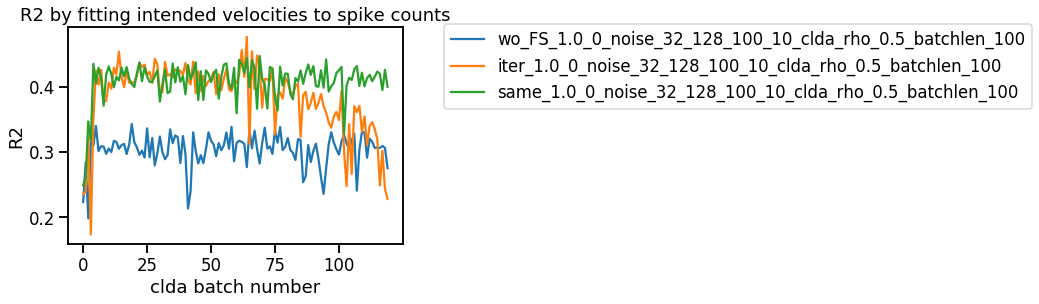

In [80]:
plt.plot(r_values_int_to_spike_all.T)
plt.xlabel('clda batch number')
plt.ylabel('R2')
plt.title('R2 by fitting intended velocities to spike counts')
plt.legend( exp_conds,bbox_to_anchor=(1.1, 1.05)
            )
plt.ylim()

(0.9251659109624865, 1.0035635280494053)

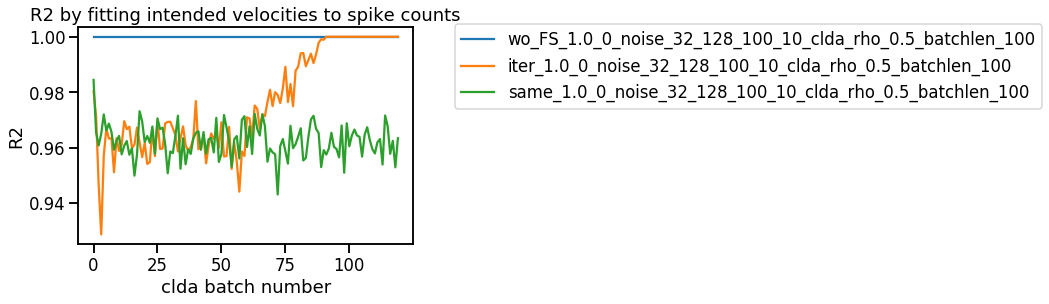

In [81]:
plt.plot(r_values_spike_to_int_all.T)
plt.xlabel('clda batch number')
plt.ylabel('R2')
plt.title('R2 by fitting intended velocities to spike counts')
plt.legend( exp_conds,bbox_to_anchor=(1.1, 1.05)
            )
plt.ylim()

In [83]:
clda_dict =  clda_dict_full[1]

intended_kin_list = clda_dict['intended_kin']
spike_counts_batch_list = clda_dict['spike_counts_batch']
intended_velocities_list = [d[(X_VEL_STATE, Y_VEL_STATE),:] for d in intended_kin_list]

In [88]:
batch_num = 61
intended_velocities_one_batch = intended_velocities_list[batch_num]
spike_counts_one_batch = spike_counts_batch_list[batch_num]


spike_counts_one_batch.shape


(69, 100)

In [96]:
redundency, coef = calc_R2([spike_counts_one_batch[:68, :]], [spike_counts_one_batch[68, :]])
relevence, coef =  calc_R2([intended_velocities_one_batch], [spike_counts_one_batch[68, :]])

print(redundency, relevence)

1
1
[0.83784] [0.3386]
